In [1]:
import numpy as np
import pandas as pd

from Tools.sample import *
from Tools.visualization import *
from Models.DecisionTree import *

In [2]:
decode = {
    'class':{'e':'edible','p':'poisonous'},
    'cap_shape':{'b':'bell','c':'conical','x':'convex',
                 'f':'flat','k':'knobbed','s':'sunken'},
    'cap_surface':{'f':'fibrous','g':'grooves',
                   'y':'scaly','s':'smooth'},
    'cap_color':{'n':'brown','b':'buff','c':'cinnamon','g':'gray',
                 'r':'green','p':'pink','u':'purple','e':'red',
                 'w':'white','y':'yellow'},
    'bruises':{'t':'bruises','f':'no'},
    'odor':{'a':'almond','l':'anise','c':'creosote',
            'y':'fishy','f':'foul','m':'musty',
            'n':'none','p':'pungent','s':'spicy'},
    'gill_attachment':{'a':'attached','d':'descending',
                       'f':'free','n':'notched'},
    'gill_spacing':{'c':'close','w':'crowded','d':'distant'},
    'gill_size':{'b':'broad','n':'narrow'},
    'gill_color':{'k':'black','n':'brown','b':'buff','h':'chocolate',
                  'g':'gray','r':'green','o':'orange','p':'pink',
                  'u':'purple','e':'red','w':'white','y':'yellow'},
    'stalk_shape':{'e':'enlarging','t':'tapering'},
    'stalk_root':{'b':'bulbous','c':'club','u':'cup','e':'equal',
                  'z':'rhizomorphs','r':'rooted','?':'missing'},
    'stalk_surface_above_ring':{'f':'fibrous','y':'scaly',
                                'k':'silky','s':'smooth'},
    'stalk_surface_below_ring':{'f':'fibrous','y':'scaly',
                                'k':'silky','s':'smooth'},
    'stalk_color_above_ring':{'n':'brown','b':'buff','c':'cinnamon',
                              'g':'gray','o':'orange','p':'pink',
                              'e':'red','w':'white','y':'yellow'},
    'stalk_color_below_ring':{'n':'brown','b':'buff','c':'cinnamon',
                              'g':'gray','o':'orange','p':'pink',
                              'e':'red','w':'white','y':'yellow'},
    'veil_type':{'p':'partial','u':'universal'},
    'veil_color':{'n':'brown','o':'orange','w':'white','y':'yellow'},
    'ring_number':{'n':'none','o':'one','t':'two'},
    'ring_type':{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large',
                 'n':'none','p':'pendant','s':'sheathing','z':'zone'},
    'spore_print_color':{'k':'black','n':'brown','b':'buff','h':'chocolate',
                         'r':'green','o':'orange','u':'purple',
                         'w':'white','y':'yellow'},
    'population':{'a':'abundant','c':'clustered','n':'numerous',
                  's':'scattered','v':'several','y':'solitary'},
    'habitat':{'g':'grasses','l':'leaves','m':'meadows',
               'p':'paths','u':'urban','w':'waste','d':'woods'}
}

In [3]:
columns = ['class','cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 
           'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
           'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 
           'stalk_surface_below_ring', 'stalk_color_above_ring', 
           'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
           'ring_type', 'spore_print_color', 'population', 'habitat']

In [4]:
# https://archive.ics.uci.edu/ml/datasets/Mushroom
data = pd.read_csv('Dataset/agaricus-lepiota.csv', header=None)
data.columns = columns
for col in columns:
    data[col] = data[col].apply(lambda x: decode[col][x])

data.head(8).T

,0,1,2,3,4,5,6,7
class,poisonous,edible,edible,poisonous,edible,edible,edible,edible
cap_shape,convex,convex,bell,convex,convex,convex,bell,bell
cap_surface,smooth,smooth,smooth,scaly,smooth,scaly,smooth,scaly
cap_color,brown,yellow,white,white,gray,yellow,white,white
bruises,bruises,bruises,bruises,bruises,no,bruises,bruises,bruises
odor,pungent,almond,anise,pungent,none,almond,almond,anise
gill_attachment,free,free,free,free,free,free,free,free
gill_spacing,close,close,close,close,crowded,close,close,close
gill_size,narrow,broad,broad,narrow,broad,broad,broad,broad
gill_color,black,black,brown,brown,black,brown,gray,brown


In [9]:
feature = range(17, 20)
pct = 0.5

print('[Features]', ', '.join([data.columns[c] for c in feature]))
y = 1*(data['class'].values == 'edible')
X = data[data.columns[1:]].values[:, np.array(feature)]
X_train, X_test, y_train, y_test = split_train_test(X, y, pct)
print('[Training Set] %s\n[Testing Set] %s' \
      % (len(y_train), 
         len(y_test)))

model_type = 'ID3'
dt = DecisionTree(model_type)
dt.fit(X_train, y_train, [data.columns[c] for c in feature])
print('\n[Model Type] %s' % model_type)
print('[Scores]\n - Training score: %s\n - Testing score: %s' \
      % (round(dt.score(X_train, y_train), 3), 
         round(dt.score(X_test, y_test), 3)))

model_type = 'C4.5'
dt = DecisionTree(model_type)
dt.fit(X_train, y_train, [data.columns[c] for c in feature])
print('\n[Model Type] %s' % model_type)
print('[Scores]\n - Training score: %s\n - Testing score: %s' \
      % (round(dt.score(X_train, y_train), 3), 
         round(dt.score(X_test, y_test), 3)))

[Features] veil_color, ring_number, ring_type
[Training Set] 4062
[Testing Set] 4062

[Model Type] ID3
[Scores]
 - Training score: 0.937
 - Testing score: 0.941

[Model Type] C4.5
[Scores]
 - Training score: 0.937
 - Testing score: 0.941


In [10]:
viz_dt(dt._tree)


- [ring_type] black
  - [veil_color] one
    - [ring_number] evanescent: 1
    - [ring_number] pendant: 1
- [ring_type] brown
  - [veil_color] one
    - [ring_number] evanescent: 1
    - [ring_number] pendant: 1
- [ring_type] buff: 1
- [ring_type] chocolate
  - [veil_color] one
    - [ring_number] flaring: 1
    - [ring_number] large: 0
    - [ring_number] pendant: 0
- [ring_type] green: 0
- [ring_type] orange: 1
- [ring_type] purple: 1
- [ring_type] white
  - [veil_color] none: 0
  - [veil_color] one
    - [ring_number] evanescent: 0
    - [ring_number] pendant: 0
  - [veil_color] two: 1
- [ring_type] yellow: 1

[Scores]
 - Training score: 0.99
 - Testing score: 0.93


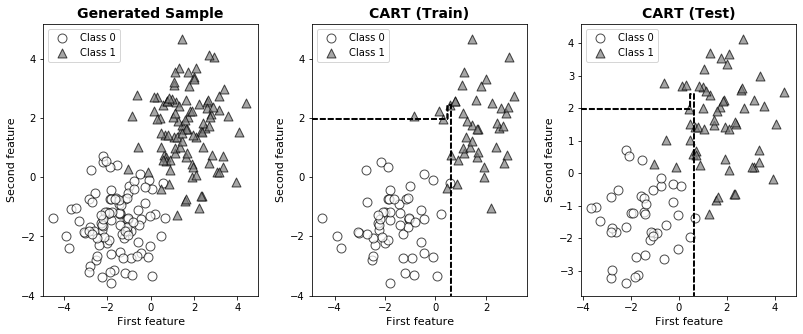

In [7]:
X, y = gen_class(n=100, interval=1.6, label_type=1, random_seed=9)
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.5)

dt = DecisionTree('CART', prune=False)
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
dt_tr = LinearClassifierPlot(ax=ax2, title='CART (Train)')
dt_tr.scatter_plot(X_train, y_train)
dt_tr.hyperplane_plot(dt)
dt_te = LinearClassifierPlot(ax=ax3, title='CART (Test)')
dt_te.scatter_plot(X_test, y_test)
dt_te.hyperplane_plot(dt)

print('[Scores]\n - Training score: %s\n - Testing score: %s' \
      % (round(dt.score(X_train, y_train), 3), 
         round(dt.score(X_test, y_test), 3)))

[Scores]
 - Training score: 0.873
 - Testing score: 0.667


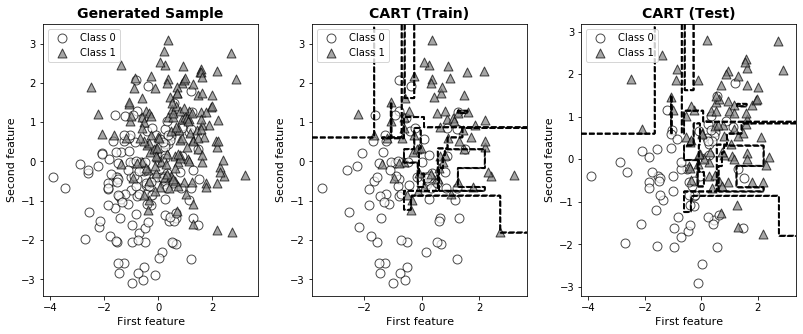

In [9]:
dt = DecisionTree('CART', prune=False)
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
dt_tr = LinearClassifierPlot(ax=ax2, title='CART (Train)')
dt_tr.scatter_plot(X_train, y_train)
dt_tr.hyperplane_plot(dt)
dt_te = LinearClassifierPlot(ax=ax3, title='CART (Test)')
dt_te.scatter_plot(X_test, y_test)
dt_te.hyperplane_plot(dt)

print('[Scores]\n - Training score: %s\n - Testing score: %s' \
      % (round(dt.score(X_train, y_train), 3), 
         round(dt.score(X_test, y_test), 3)))

c:\Users\ZIJIN\Desktop\statistical_learning\Chapter\Models\DecisionTree.py:323: RuntimeWarning: invalid value encountered in double_scalars
  g = (tree._loss-C) / (T-1)
[Scores]
 - Training score: 0.733
 - Testing score: 0.7


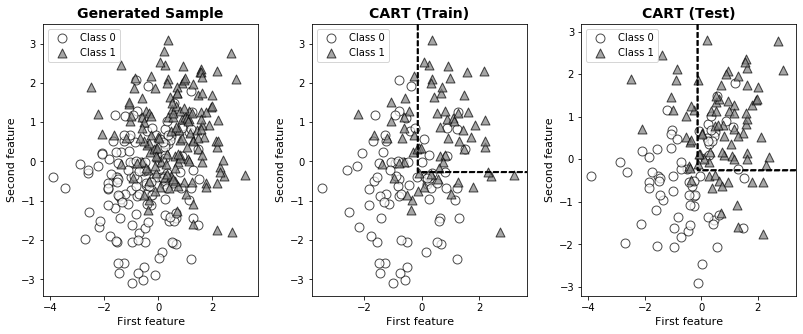

In [8]:
X, y = gen_class(n=150, interval=0.6, label_type=1, random_seed=9)
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.5)
dt = DecisionTree('CART')
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
dt_tr = LinearClassifierPlot(ax=ax2, title='CART (Train)')
dt_tr.scatter_plot(X_train, y_train)
dt_tr.hyperplane_plot(dt)
dt_te = LinearClassifierPlot(ax=ax3, title='CART (Test)')
dt_te.scatter_plot(X_test, y_test)
dt_te.hyperplane_plot(dt)

print('[Scores]\n - Training score: %s\n - Testing score: %s' \
      % (round(dt.score(X_train, y_train), 3), 
         round(dt.score(X_test, y_test), 3)))